<a href="https://colab.research.google.com/github/Leop250/Machine_learning/blob/main/projet_fin_de_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Nous importons la totalité des librairies néssesaire pour réaliser le projet

## Lecture du fichier

In [ ]:
df = pd.read_csv('bienetre.csv')
df_scaled = df.copy()
df_scaled.drop('target', inplace=True, axis=1)
print(df_scaled.head())

         age      taille      poids       revenu  experience  education  \
0  76.378818  172.472900  93.637574  2317.284189   23.187146   2.524067   
1  39.629339  162.527782  88.071856  2740.909189   26.742305   3.136856   
2  36.506832  196.457696  85.160759  3541.036636   20.895824   4.282662   
3  50.016190  174.829299  72.362368  3093.794975   26.155986   3.007974   
4  60.743330  171.536491  54.874865  2113.805284   14.771488   2.780533   

         imc    stress  nb_enfants     depenses  exercice  alimentation  \
0  24.544095  5.805570         1.0  1429.244924       4.0      6.128322   
1  26.805875  3.970287         1.0  1694.538136       1.0      6.068320   
2  24.218407  2.312967         0.0  3094.685811       3.0      6.503321   
3  23.452811  5.387465         0.0  1344.690334       3.0      6.015851   
4  26.065223  6.859302         1.0  1626.714555       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfaction     risque  \
0  7.656376  129.058650

## Afficher la matrice de convolution

Nous importons le fichier CSV et l'affichons pour valider son importation.

### Normalisation Standard

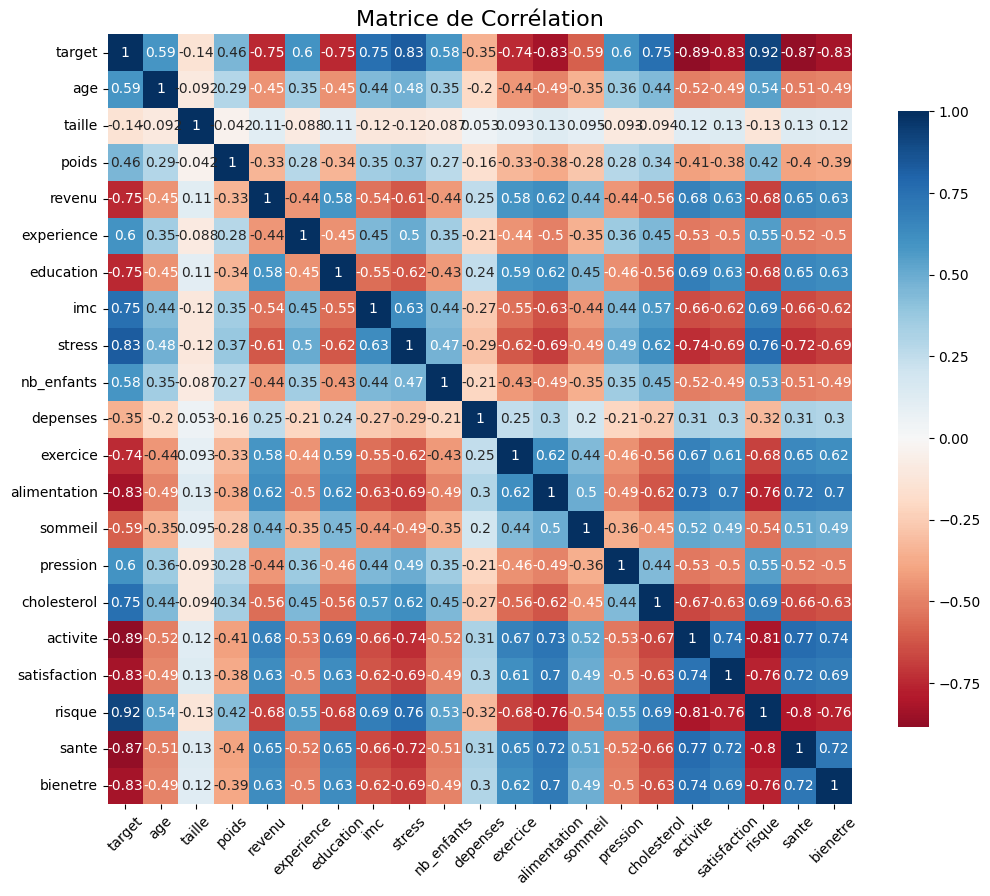

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu', cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.describe()

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.800000,47.978640,170.535341,74.042819,2796.214262,19.032658,3.299494,25.621232,4.598669,1.836000,...,2.626100,6.402255,7.195132,123.047003,204.035817,5.796017,6.393817,44.145412,73.824255,6.402144
std,0.748369,12.457695,10.114769,13.341103,781.533488,6.242550,0.779620,3.380089,1.807880,1.217396,...,1.543353,1.804730,1.231426,12.549389,30.366382,2.163302,1.789406,24.605016,17.215520,1.797726
min,0.000000,7.587327,129.436247,31.449135,275.978543,-6.476955,1.000000,16.595884,-0.817043,0.000000,...,0.000000,1.000000,2.773131,79.364067,113.800424,1.000000,1.000000,0.000000,16.932014,0.699666
25%,0.000000,39.405573,163.740683,64.729830,2204.563230,14.697224,2.718558,23.240084,3.197705,1.000000,...,1.000000,5.101108,6.369437,114.360830,181.995873,4.113038,5.129324,23.080978,60.948984,5.114500
50%,1.000000,47.619796,170.490729,73.192735,2757.064229,18.971618,3.278090,25.314537,4.489886,2.000000,...,3.000000,6.502440,7.214413,122.755603,202.548092,5.651046,6.484931,43.577995,76.565336,6.499488
75%,1.000000,56.637883,177.275880,82.251508,3381.817122,23.292222,3.890786,27.579416,5.882468,3.000000,...,4.000000,7.805253,8.051258,131.595146,225.125376,7.684186,7.766372,60.885159,88.778946,7.787756
max,2.000000,93.773829,214.790843,140.374368,5363.916672,40.327629,5.000000,40.608144,10.605591,7.000000,...,8.000000,10.000000,11.331989,167.334076,305.815869,10.000000,10.000000,100.000000,100.000000,10.000000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=df_scaled.columns)
X_scaled.head()
df_scaled = X_scaled.copy()
df_scaled['target'] = df['target']
df_scaled.head()

,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,depenses,...,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre,target
0,2.279844,0.191567,1.468824,-0.612839,0.665545,-0.994671,-0.318687,0.667612,-0.686746,-0.727963,...,-0.151793,0.374580,0.479063,0.822289,-0.606725,0.180294,0.075670,-0.161065,-0.874886,1
1,-0.670246,-0.791710,1.051618,-0.070768,1.235077,-0.208622,0.350494,-0.347597,-0.686746,-0.230451,...,-0.185042,-1.701328,-0.160035,1.288805,-0.410068,-0.932284,-0.051405,-0.518374,-0.226504,1
2,-0.920907,2.562951,0.833402,0.953074,0.298477,1.261149,-0.415047,-1.264363,-1.508213,2.395286,...,0.056003,0.696785,-1.179145,2.213298,0.558314,1.390604,-0.853248,0.774877,0.957294,0
3,0.163566,0.424545,-0.125967,0.380784,1.141150,-0.373944,-0.641560,0.436332,-1.508213,-0.886530,...,-0.214117,-1.049163,0.141935,0.509582,-0.566711,-0.447901,0.295409,-0.089794,-0.042210,1
4,1.024694,0.098984,-1.436831,-0.873210,-0.682635,-0.665691,0.131361,1.250496,-0.686746,-0.357642,...,-0.586075,-0.728784,-0.444839,0.679923,-0.300729,-0.688234,0.137607,-0.086171,-1.061694,1


In [ ]:
print(df_scaled.head())

        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

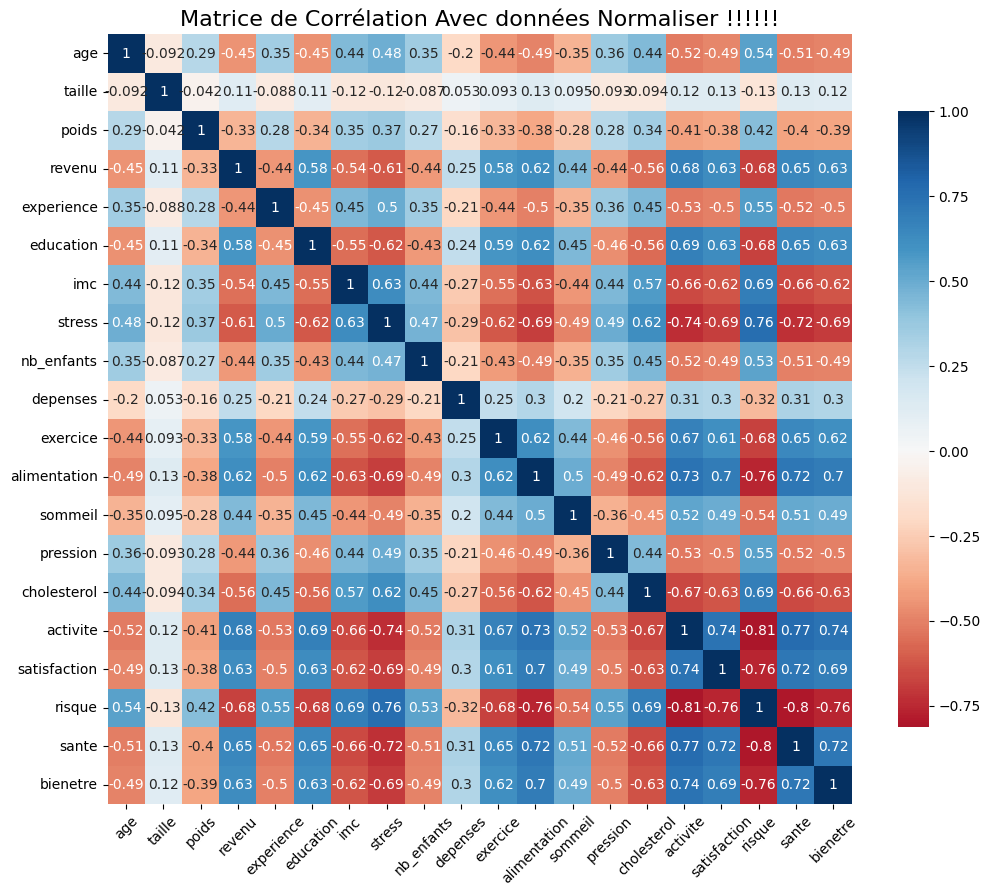

In [ ]:
correlation_matrix = X_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu', cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation Avec données Normaliser !!!!!!', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Nous avons procédé à plusieurs étapes :

*   Normalisation des données
*   Suppression, pour la suite du TP, de la colonne target
*  Affichage de la matrice de corrélation pour identifier les colonnes les plus corrélées entre elles

:



### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
X_pca = pca.transform(X_scaled)

In [ ]:
df_pca= pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

print(df_scaled.head())

        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

📒  Nous avons procédé à la PCA, mais qu'est-ce que c'est et à quoi cela sert ? La PCA (Analyse en Composantes Principales) est un algorithme qui va réduire les données, les compresser, afin de réduire la dimensionnalité tout en conservant autant d'information que possible. Cela permet d'avoir des modèles qui fonctionnent de manière plus rapide.

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_)

[0.53565264 0.04781922 0.04266001 0.037956   0.03201033 0.03182289
 0.03134011 0.03087156 0.02951455 0.02340206 0.02100827 0.02037142
 0.02011083 0.01830587 0.0151754  0.01497781 0.01435587 0.0125585
 0.01087435 0.00840122 0.0008111 ]
[0.53565264 0.58347186 0.62613187 0.66408787 0.6960982  0.72792109
 0.75926121 0.79013277 0.81964732 0.84304938 0.86405764 0.88442907
 0.90453989 0.92284576 0.93802116 0.95299897 0.96735484 0.97991334
 0.99078768 0.9991889  1.        ]
[0.53565264 0.04781922 0.04266001 0.037956   0.03201033 0.03182289
 0.03134011 0.03087156 0.02951455 0.02340206 0.02100827 0.02037142
 0.02011083 0.01830587 0.0151754  0.01497781 0.01435587 0.0125585
 0.01087435 0.00840122 0.0008111 ]


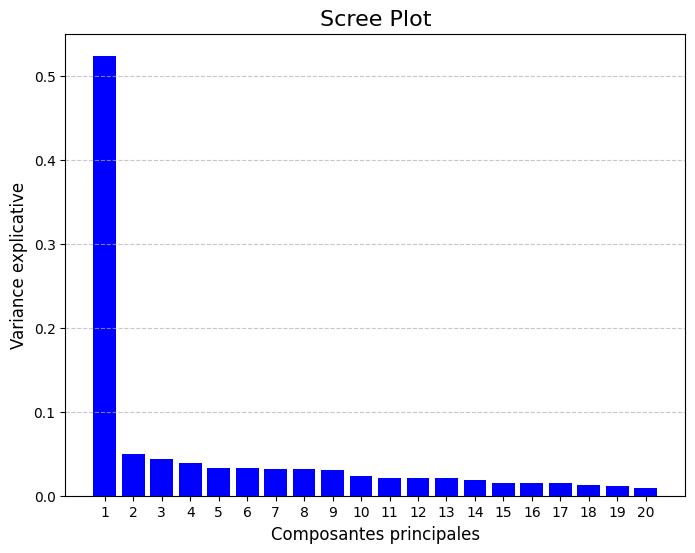

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, linewidth=2, color='blue')
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Composantes principales', fontsize=12)
plt.ylabel('Variance explicative', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Par exemple, ici nous avons réduit la PCA, et avec une seule composante, nous avons plus de 50 % des informations du dataset. Ceci n'est pas énorme comparé à d'autres dataset où, parfois, nous pouvons atteindre 80 % d'information avec seulement deux composantes.

### Graph 2D/3D

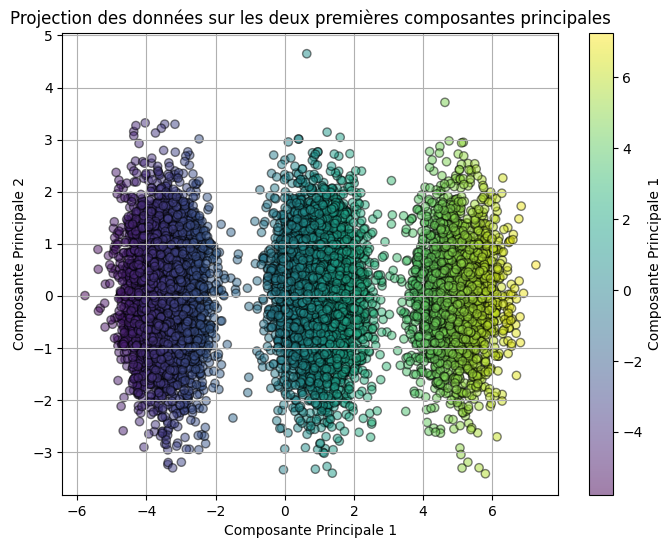

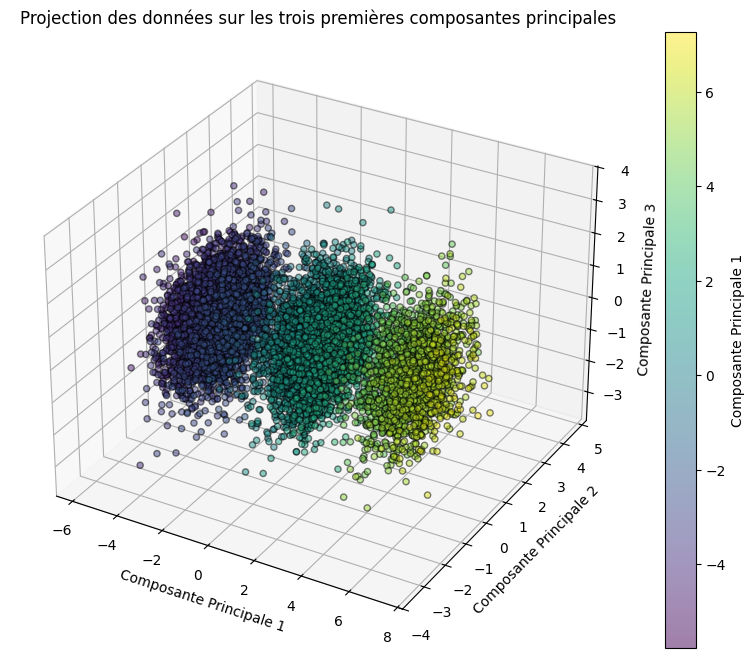

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Pour le graphique en 2D avec couleur
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=X_pca[:, 0], cmap='viridis', edgecolors='k')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.colorbar(label='Composante Principale 1')
plt.grid()
plt.show()

# Pour le graphique en 3D avec couleur
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, c=X_pca[:, 0], cmap='viridis', edgecolors='k')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Projection des données sur les trois premières composantes principales')
plt.colorbar(sc, label='Composante Principale 1')
plt.show()


### Validité des donnée de la PCA EN 2D et 3D

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

Nous avons affiché les PCA en 2D et 3D. Celles-ci sont bien distinguables, ce qui pourrait conduire à une accuracy de 1 dans les prochains modèles, ce qui est normalement impossible.

## k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

[0 0 1 ... 0 1 0]


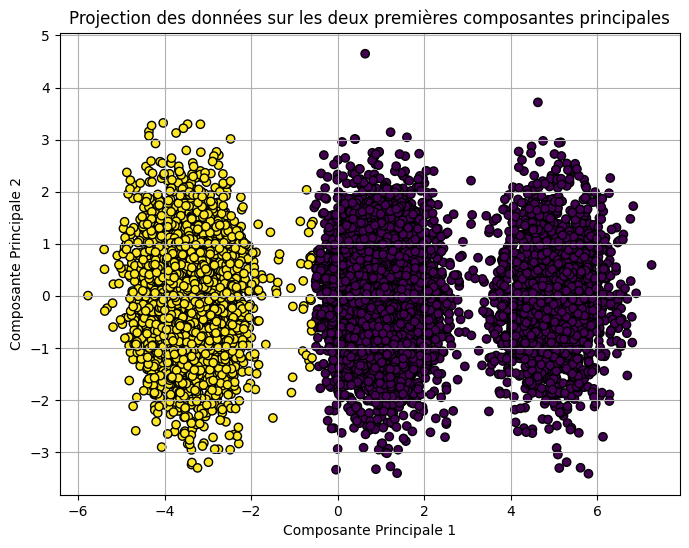

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca_2d)
labels = kmeans.labels_
print(labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid()
plt.show()

[0 0 1 ... 0 1 0]


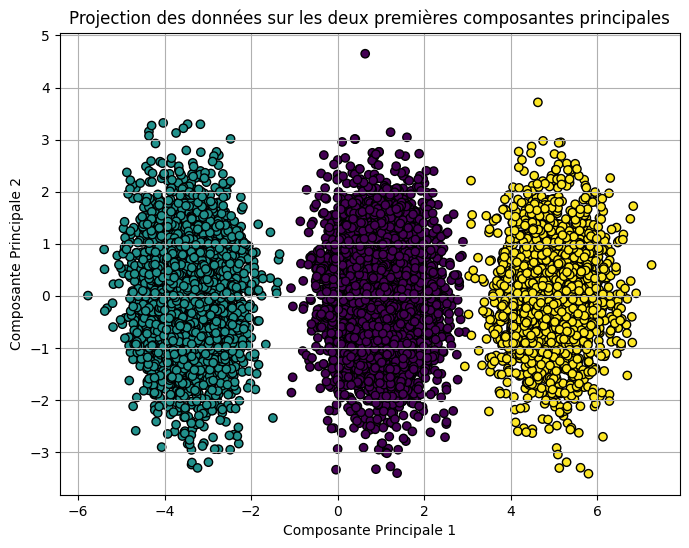

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca_3d)
labels = kmeans.labels_
print(labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid()
plt.show()

Nous avons un model de k-means mais qu'est ce que c'est ?


*   Le K-mean a un apprentissage non supervisé et permet de classifier en cluster. Son but est de diviser un ensemble de données en groupes, il a un hyperparamètre.
*   L'algo affecte les points dans des groupes en fonction d'un calcul sur leur proximité avec leur centre, et ajuste les centres à chaque itération en fonction des points du groupe.



### Cross Validation

In [ ]:
X = df_scaled
y = df['target']
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

scores_2D = cross_val_score(model, X_pca_2d, y, cv=5, scoring='accuracy')
print('Scores de validation croisée pour la PCA En 2D: ', scores_2D)
print('Score moyen de validation croisée: ', scores_2D.mean())


scores_3D = cross_val_score(model, X_pca_3d, y, cv=5, scoring='accuracy')
print('Scores de validation croisée pour la PCA En 3D: ', scores_3D)
print('Score moyen de validation croisée: ', scores_3D.mean())

Scores de validation croisée pour la PCA En 2D:  [0.999  0.9985 0.9975 0.9995 0.9985]
Score moyen de validation croisée:  0.9986
Scores de validation croisée pour la PCA En 3D:  [0.999  0.9985 0.9975 0.9995 0.9985]
Score moyen de validation croisée:  0.9986


Nous obtenons une très bonne accuracy de 99 % avec la PCA en 2D et 3D, ce qui signifie qu'il manque de bruit dans les données générées, car l'ajout d'une composante supplémentaire ne parvient pas à ajouter de manière significative de l'information.

#### Logistic Regression nombre de composante nesssesaire **(nécessaire si Léopold ne fait pas de fautes)** pour 95%


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: {num_components}')

Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: 16


### ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

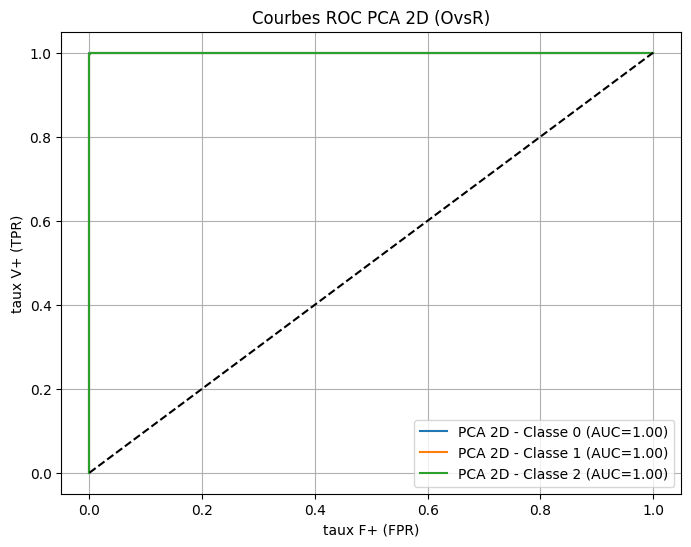

In [ ]:
y_prob_2d = logistic_2d.predict_proba(X_pca_2d)  # Get predicted probabilities

y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_2d[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'PCA 2D - Classe {i} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('taux F+ (FPR)')
plt.ylabel('taux V+ (TPR)')
plt.title('Courbes ROC PCA 2D (OvsR)')
plt.legend()
plt.grid()
plt.show()

Pourquoi la ROC est perpendiculaire avec une accuracy a 100% ❓

Nous obtenons une courbe ROC perpendiculaire, indiquant une accuracy de 1 en raison du peu de bruit. De plus, lors de la visualisation de la PCA, nous pouvons bien distinguer les valeurs elles-mêmes, sans chevauchement.


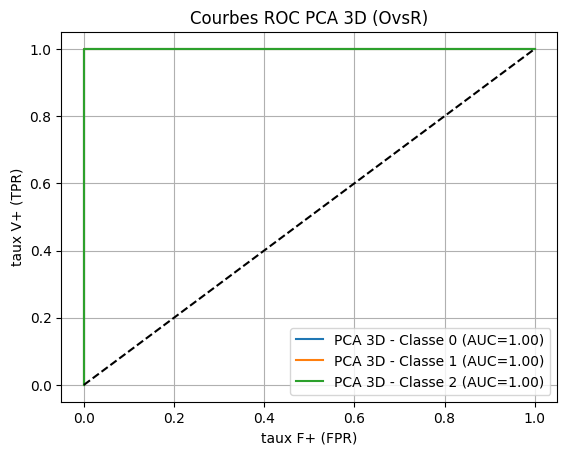

In [ ]:
y_prob_3d = logistic_3d.predict_proba(X_pca_3d)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_3d[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'PCA 3D - Classe {i} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('taux F+ (FPR)')
plt.ylabel('taux V+ (TPR)')
plt.title('Courbes ROC PCA 3D (OvsR)')
plt.legend()
plt.grid()
plt.show()


### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_2d = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_2d.fit(X_pca_2d, y)

print("Meilleurs paramètres (PCA 2D) :", grid_search_2d.best_params_)
print("Meilleur score (PCA 2D) :", grid_search_2d.best_score_)

grid_search_3d = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_3d.fit(X_pca_3d, y)

print("Meilleurs paramètres (PCA 3D) :", grid_search_3d.best_params_)
print("Meilleur score (PCA 3D) :", grid_search_3d.best_score_)

Meilleurs paramètres (PCA 2D) : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Meilleur score (PCA 2D) : 0.9989000000000001
Meilleurs paramètres (PCA 3D) : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Meilleur score (PCA 3D) : 0.999


Le Grid Search défini ici dans le modèle permet à un algorithme non supervisé de définir les meilleurs paramètres pour entraîner le modèle afin d’obtenir la meilleure accuracy

---



#### Déterminer le nombre de composantes nécessaires pour atteindre 95% de variance cumulative. avec le moddel KNN

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: {num_components}')

Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: 16


###k-means

[0 0 1 ... 0 1 0]


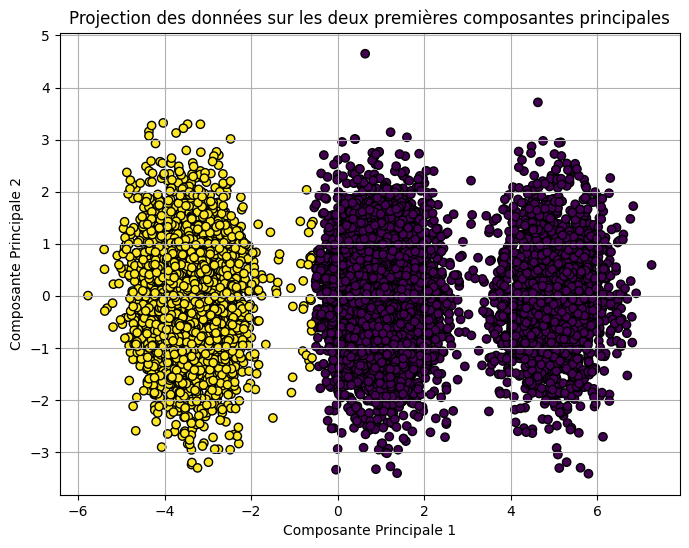

[0 0 1 ... 0 1 0]


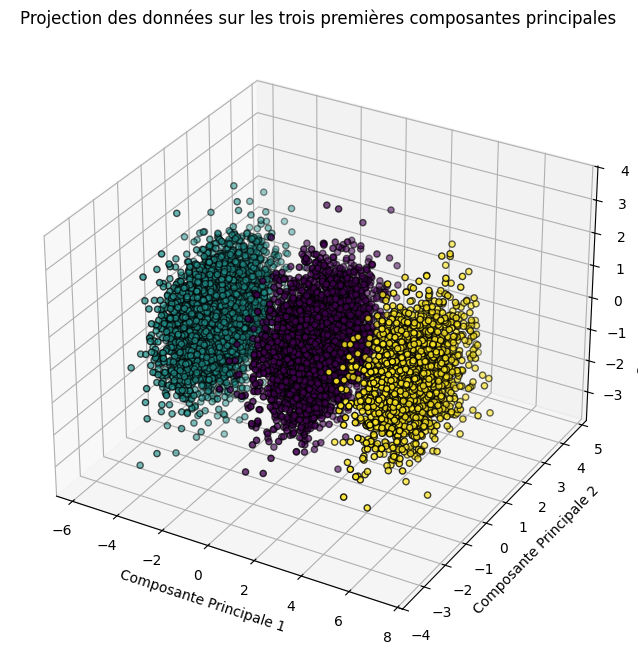

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca_2d)
labels = kmeans.labels_
print(labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid()
plt.show()

# ----------------------------------------------------------------------------------------

kmeans_3D = KMeans(n_clusters=3)
kmeans_3D.fit(X_pca_3d)
labels = kmeans_3D.labels_
print(labels)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', edgecolors='k')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Projection des données sur les trois premières composantes principales')
plt.show()



### Régression Logistic PCA 2D/3D

In [ ]:
logistic_2d = LogisticRegression()
logistic_2d.fit(X_pca_2d, y)
y_pred_2d = logistic_2d.predict(X_pca_2d)
accuracy_2d = metrics.accuracy_score(y, y_pred_2d)
print('Accuracy  PCA 2D data: ', accuracy_2d)

logistic_3d = LogisticRegression()
logistic_3d.fit(X_pca_3d, y)
y_pred_3d = logistic_3d.predict(X_pca_3d)
accuracy_3d = metrics.accuracy_score(y, y_pred_3d)
print('Accuracy with PCA 3D data: ', accuracy_3d)

Accuracy  PCA 2D data:  0.9987
Accuracy with PCA 3D data:  0.9987


Nous avons fait un code de régression logistique basé sur le modèle de la PCA en 2D et en 3D.

## KNN PCA 2D/3D

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_scores_2d = cross_val_score(knn, X_pca_2d, y, cv=5, scoring='accuracy')
print('Scores de validation croisée avec KNN: ', knn_scores_2d)
print('Score moyen de validation croisée avec KNN: ', knn_scores_2d.mean())

knn_scores_3d = cross_val_score(knn, X_pca_3d, y, cv=5, scoring='accuracy')
print('Scores de validation croisée avec KNN: ', knn_scores_3d)
print('Score moyen de validation croisée avec KNN: ', knn_scores_3d.mean())

Scores de validation croisée avec KNN:  [0.999  0.999  0.997  0.9995 0.999 ]
Score moyen de validation croisée avec KNN:  0.9987
Scores de validation croisée avec KNN:  [0.9985 0.999  0.9975 0.9995 0.9995]
Score moyen de validation croisée avec KNN:  0.9988000000000001


Nous avons fait un code de KNN basé sur le modèle de la PCA en 2D et en 3D.




Le K-Nearest Neighbors (KNN) est un algorithme de classification simple et intuitif.
Il est basé sur le principe de proximité : un objet est classé en fonction de la majorité des classes de ses K voisins les plus proches.



In [ ]:
### je transorme mon df_scaled en un tableau numpy* pour pourvoir l'utiliser en abre de decision
df_scaled_datarame = pd.DataFrame(df_scaled)
print(df_scaled_datarame.head())
print(df_scaled_datarame["target"].head())

        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

##Arbre de décision

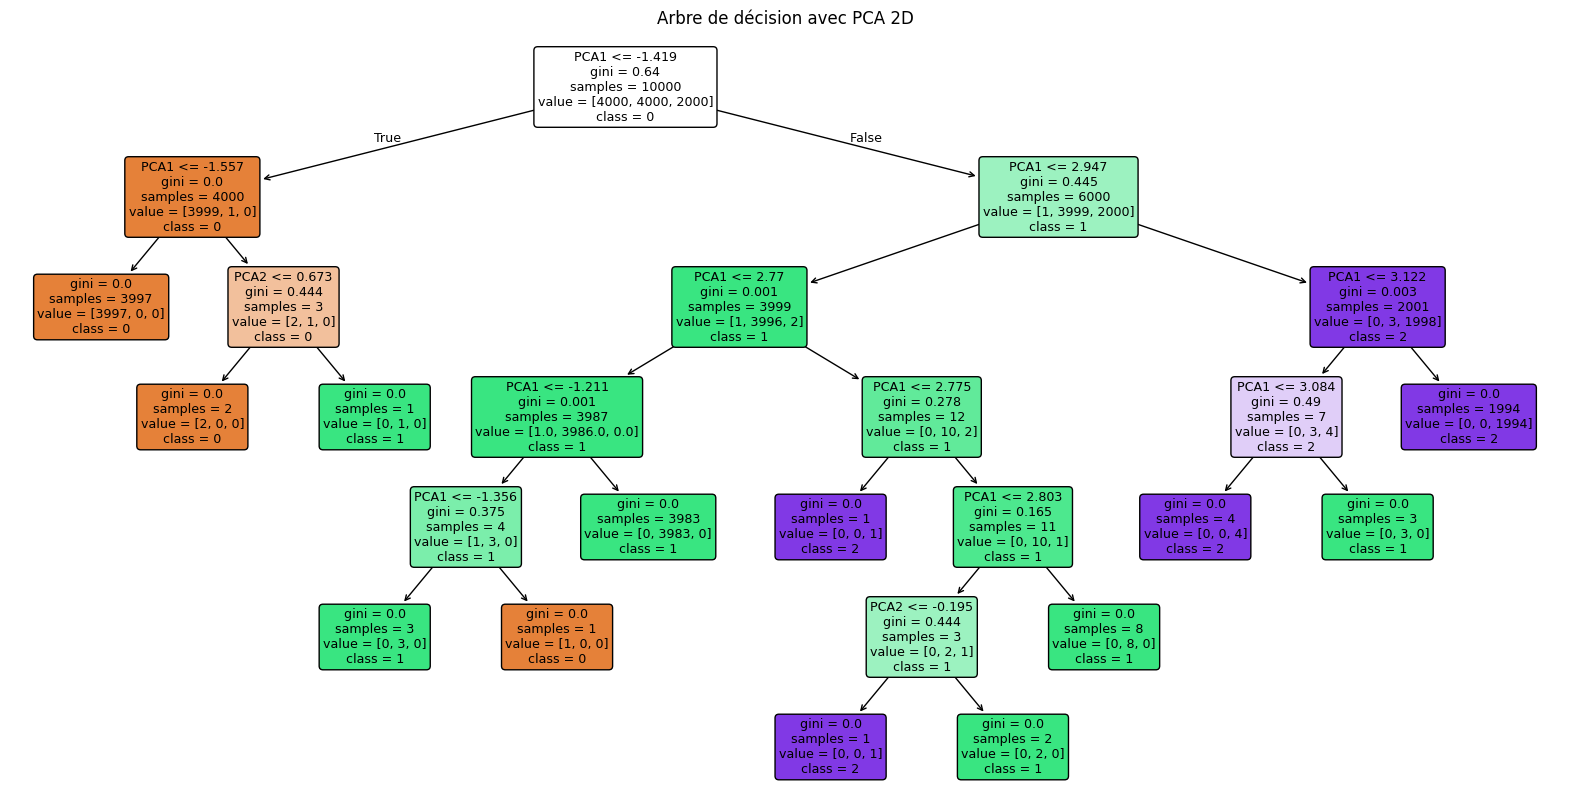

---------------------------------------------------------------------------------------------------------------------------------------


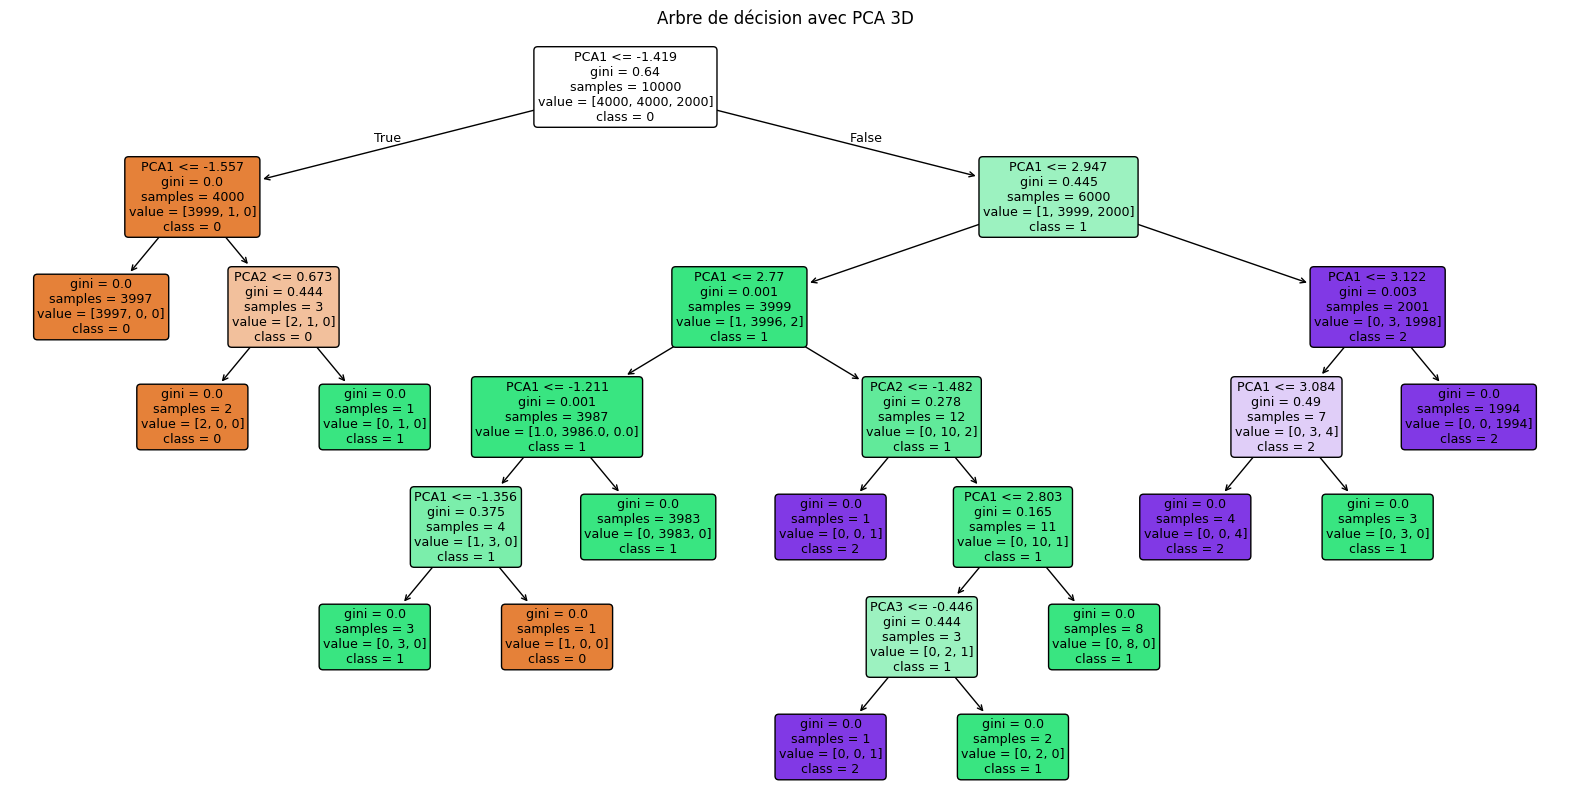

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_2d = DecisionTreeClassifier(random_state=42)
clf_2d.fit(X_pca_2d, y)

plt.figure(figsize=(20,10))
plot_tree(clf_2d, filled=True, feature_names=['PCA1', 'PCA2'], class_names=[str(c) for c in set(y)], rounded=True)
plt.title("Arbre de décision avec PCA 2D")
plt.show()

print("---------------------------------------------------------------------------------------------------------------------------------------")

clf_3d = DecisionTreeClassifier(random_state=42)
clf_3d.fit(X_pca_3d, y)

plt.figure(figsize=(20,10))
plot_tree(clf_3d, filled=True, feature_names=['PCA1', 'PCA2', 'PCA3'], class_names=[str(c) for c in set(y)], rounded=True)
plt.title("Arbre de décision avec PCA 3D")
plt.show()


😯 Nous obtenons le même arbre de décision, car dans les données principales, il n’y a pas assez de bruit, ce qui lui permet de distinguer parfaitement les données entre elles.

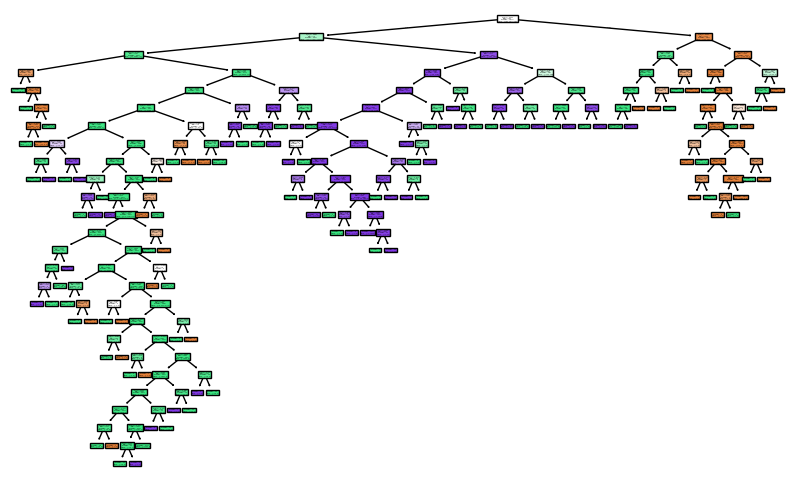

In [ ]:
X = df_scaled_datarame.iloc[:, :-1]
y = df_scaled_datarame.iloc[:, -1]
model = DecisionTreeClassifier()
model.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(model, filled=True)
plt.show()

In [ ]:
import numpy as np

# verfication de verifier si cela est normal de avoir deux fois le même abre de décision demander a chatgpt x
explained_variance = np.var(X_pca_3d, axis=0) / np.var(X_pca_3d, axis=0).sum()
print("Variance expliquée par chaque composante :", explained_variance)



Variance expliquée par chaque composante : [0.84918462 0.07970878 0.0711066 ]


Nous avons fait un calcul pour démontrer de manière mathématique la raison de l’accuracy à 100 %, et cela vient du fait que la troisième composante de la PCA apporte une quantité minime d’information.